In [0]:
from __future__ import absolute_import, division, print_function
import os
import matplotlib.pyplot as plt
import numpy as np


![picture](https://drive.google.com/uc?id=1IlNqrBjRL9V18n_Km2BZSXcXMxe4iAHA)

In [0]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [3]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin = _URL , extract = True)

68608000/68606236 [==============================] - 1s 0us/step


In [4]:
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats


In [0]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [6]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))
num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))
total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val
print('total training cat images', num_cats_tr)
print('total training dog images', num_dogs_tr)
print('total validation cat images', num_cats_val)
print('total validation dog images', num_dogs_val)
print('total training images', total_train)
print('total validation images', total_val)

total training cat images 1000
total training dog images 1000
total validation cat images 500
total validation dog images 500
total training images 2000
total validation images 1000


In [0]:
BATCH_SIZE = 100
IMG_SHAPE = 150

In [0]:
def plotimages(image_arr):
   fig, axes= plt.subplots(1,5, figsize=(20,20))
   for img, ax in zip(image_arr, axes):
     ax.imshow(img)
     plt.tight_layout()
     plt.imshow(img)


In [9]:
image_gen = ImageDataGenerator(rescale= 1./255, horizontal_flip=True)
train_data_gen = image_gen.flow_from_directory(batch_size = BATCH_SIZE,
                                               directory = train_dir,
                                               shuffle = True,
                                               target_size = (IMG_SHAPE,IMG_SHAPE))

Found 2000 images belonging to 2 classes.


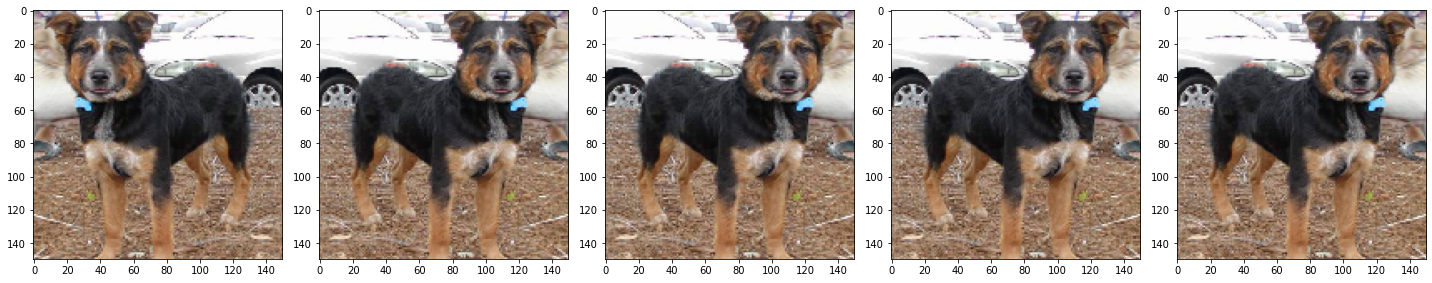

In [0]:
augmented_images = [train_data_gen[0][0][0] for i in range(4) ]
plotimages(augmented_images)

In [0]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range= 50)
train_data_gen = image_gen.flow_from_directory(batch_size = BATCH_SIZE,
                                               directory = train_dir,
                                               target_size = (IMG_SHAPE,IMG_SHAPE))

Found 2000 images belonging to 2 classes.


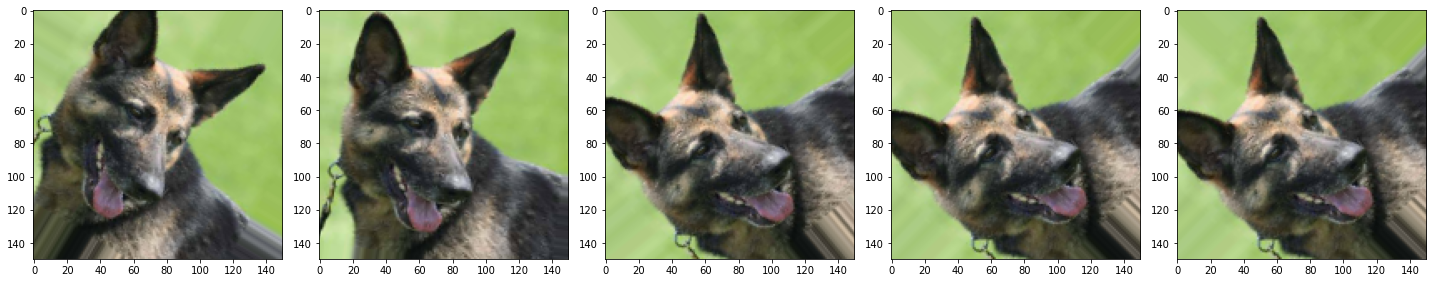

In [0]:
augmented_images = [train_data_gen[0][0][0] for i in range(4)]
plotimages(augmented_images)

In [0]:
image_gen = ImageDataGenerator(rescale = 1./255, zoom_range= 0.5)
train_data_gen = image_gen.flow_from_directory(batch_size = BATCH_SIZE,
                                               directory = train_dir,
                                               shuffle = True,
                                               target_size = (IMG_SHAPE,IMG_SHAPE))

Found 2000 images belonging to 2 classes.


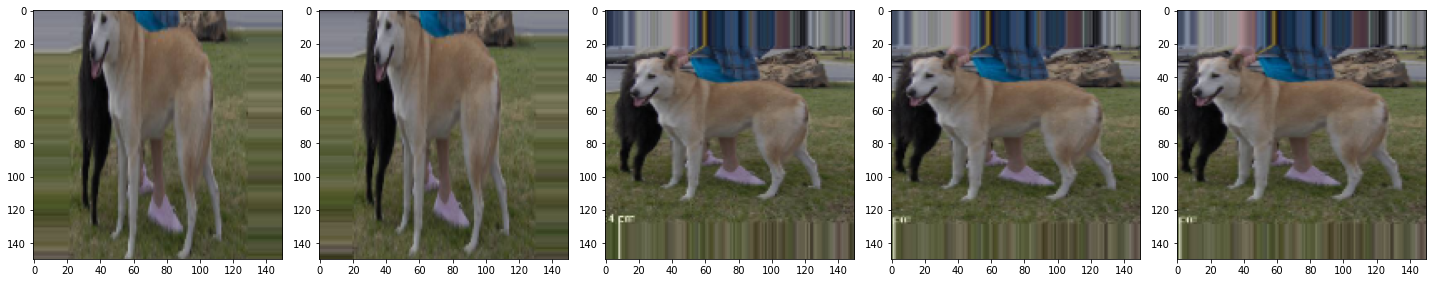

In [0]:
augmented_images = [train_data_gen[2][0][0] for i in range(4)]
plotimages(augmented_images)

In [10]:
image_gen_train = ImageDataGenerator(rescale = 1./255, 
                               rotation_range = 40,
                               width_shift_range = 0.3,
                               height_shift_range = 0.4,
                               shear_range = 0.3,
                               zoom_range = 0.2,
                               fill_mode = 'nearest')
train_data_gen = image_gen_train.flow_from_directory(batch_size = BATCH_SIZE,
                                               directory = train_dir,
                                               shuffle = True,
                                               target_size = (IMG_SHAPE,IMG_SHAPE),
                                               class_mode = 'binary')

Found 2000 images belonging to 2 classes.


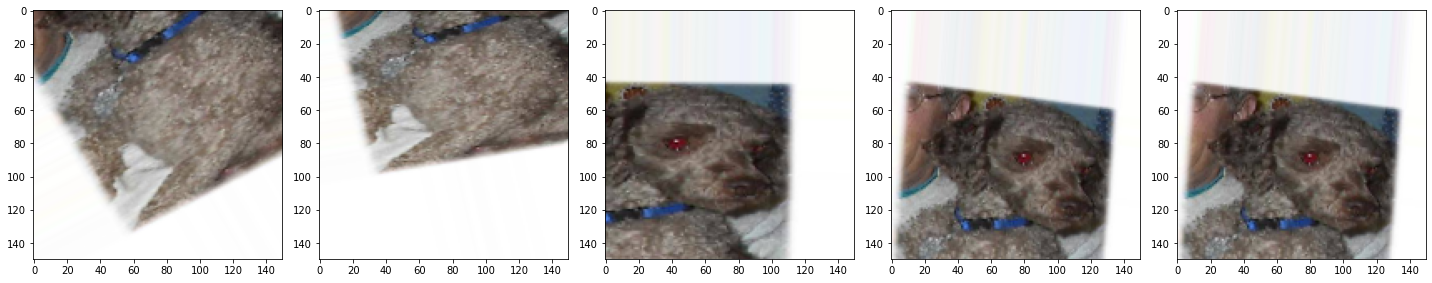

In [11]:
augmented_images = [train_data_gen[0][0][0] for i in range(4)]
plotimages(augmented_images)

In [12]:
image_gen_val = ImageDataGenerator(rescale = 1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size = BATCH_SIZE,
                                                 directory = validation_dir,
                                                 target_size = (IMG_SHAPE,IMG_SHAPE),
                                                 class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [0]:
model = tf.keras.models.Sequential([ 
                                    tf.keras.layers.Conv2D(10,(3,3),activation='relu', input_shape=(150,150,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(20,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(30,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(40,(3,3), activation = 'relu'),
                                    
                                    tf.keras.layers.Dropout(0.3),

                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    tf.keras.layers.Dense(2,activation='softmax')
])

In [0]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 148, 148, 10)      280       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 10)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 72, 72, 20)        1820      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 20)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 34, 34, 30)        5430      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 17, 17, 30)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 15, 15, 40)        1

In [0]:
epochs = 100
history = model.fit_generator(train_data_gen,
                              steps_per_epoch = int(np.ceil(total_train/float(BATCH_SIZE))),
                              epochs = epochs,
                              validation_data = val_data_gen,
                              validation_steps = int(np.ceil(total_val/float(BATCH_SIZE)))
                              
                              )

Epoch 1/100
20/20 [==============================] - 16s 818ms/step - loss: 0.9435 - accuracy: 0.5005 - val_loss: 0.6908 - val_accuracy: 0.5240
Epoch 2/100
20/20 [==============================] - 17s 843ms/step - loss: 0.6914 - accuracy: 0.5330 - val_loss: 0.6794 - val_accuracy: 0.5590
Epoch 3/100
20/20 [==============================] - 17s 851ms/step - loss: 0.6905 - accuracy: 0.5030 - val_loss: 0.6881 - val_accuracy: 0.5080
Epoch 4/100
20/20 [==============================] - 17s 855ms/step - loss: 0.6889 - accuracy: 0.5130 - val_loss: 0.6852 - val_accuracy: 0.5520
Epoch 5/100
20/20 [==============================] - 17s 847ms/step - loss: 0.6880 - accuracy: 0.5355 - val_loss: 0.6851 - val_accuracy: 0.5580
Epoch 6/100
20/20 [==============================] - 17s 830ms/step - loss: 0.6876 - accuracy: 0.5615 - val_loss: 0.6902 - val_accuracy: 0.5370
Epoch 7/100
20/20 [==============================] - 17s 852ms/step - loss: 0.6860 - accuracy: 0.5630 - val_loss: 0.6792 - val_accuracy:

<function matplotlib.pyplot.imshow>

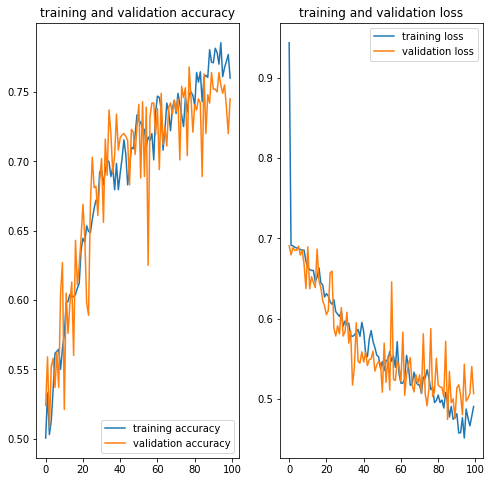

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='training accuracy')
plt.plot(epochs_range,val_acc,label='validation accuracy')
plt.legend(loc = 'lower right')
plt.title('training and validation accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='training loss')
plt.plot(epochs_range,val_loss,label='validation loss')
plt.legend(loc='upper right')
plt.title('training and validation loss')
plt.imshow


In [0]:
def plottheimages(image_arrow):
   #fig, axes= plt.subplots(1,5, figsize=(20,20))
   for img in zip(image_arrow):
     #ax.imshow(img)
     #plt.tight_layout()
     plt.imshow(img)

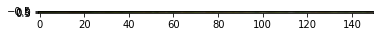

In [0]:
testing_images = train_data_gen[0][0][0] 
plottheimages(testing_images)

In [13]:
from zipfile import ZipFile
filename = "cat images for ML.zip"
with ZipFile(filename, 'r') as zip:
  zip.extractall()
  print('done')

done


In [15]:
print(filename)


cat images for ML.zip


In [16]:
from google.colab import files
uploaded = files.upload()


KeyboardInterrupt: ignored

In [34]:
import zipfile
import io
uploaded = files.upload()
data = zipfile.ZipFile(io.BytesIO(uploaded['cat images for ML.zip']), 'r')
data_cat_img = data.extractall()

Saving Cat_March_2010-1.jpg to Cat_March_2010-1 (2).jpg


KeyError: ignored

In [19]:
data.printdir()

File Name                                             Modified             Size
cat images for ML/2-dog.jpg                    2020-05-04 10:40:42       415118
cat images for ML/322868_1100-1100x628.jpg     2020-05-04 10:40:02        51106
cat images for ML/Cat_March_2010-1.jpg         2020-05-02 08:27:04      2672116
cat images for ML/images (1).jpg               2020-05-04 10:41:44         6063
cat images for ML/images.jpg                   2020-05-04 10:40:26         7359
cat images for ML/istock-1069317442.jpg        2020-05-04 10:42:04        32871


In [0]:
roses = list(data_dir.glob('roses/*'))

for image_path in roses[:3]:
    display.display(Image.open(str(image_path)))

In [0]:
test_data_dir = 'data/test' 

In [33]:
print(test_data_dir)

data/test


In [25]:
from google.colab import files
from io import BytesIO
from PIL import Image

uploaded = files.upload()


Saving Cat_March_2010-1.jpg to Cat_March_2010-1 (1).jpg


In [27]:
im = Image.open(BytesIO(uploaded['Cat_March_2010-1 (1).jpg']))

KeyError: ignored

In [31]:
from zipfile import ZipFile
from PIL import Image
from StringIO import StringIO

archive = ZipFile("cat images for ML", 'r')
image_data = archive.read("image.png")
fh = StringIO(image_data)
img = Image.open(fh)

ModuleNotFoundError: ignored